<a href="https://colab.research.google.com/github/bubinsabu/datasets_classification/blob/main/MNIST__Digits_Classificatiion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from io import IncrementalNewlineDecoder
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualize Examples

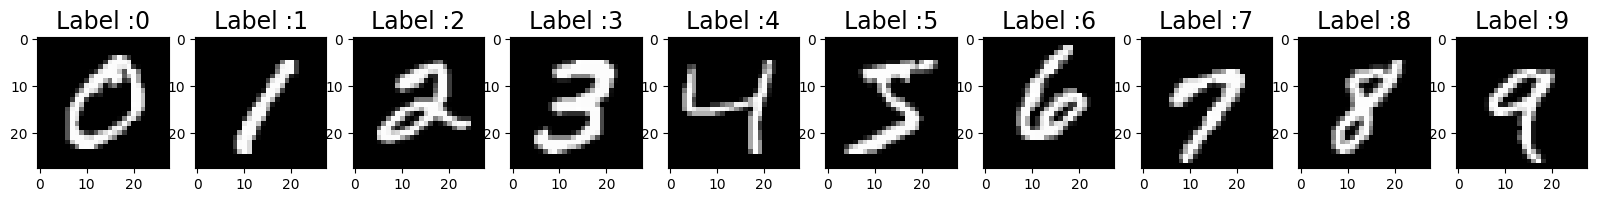

In [ ]:
num_classes = 10
# for figure and axis
f, ax = plt.subplots(1, num_classes, figsize = (20,20))

for i in range (0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample,cmap = "gray")
  ax[i].set_title("Label :{}".format(i), fontsize = 17)




In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [ ]:
# Normalize Data
x_train = x_train/ 255.0
x_text = x_test/ 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#create model - fully connected neural network


In [ ]:
from keras.engine import input_layer
model = Sequential()
model.add(Dense(units = 128, input_shape = (784,), activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Train

In [ ]:
batch_size = 512
epochs = 10
model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10
118/118 [==============================] - 2s 10ms/step - loss: 0.5832 - accuracy: 0.8312
Epoch 2/10
118/118 [==============================] - 1s 9ms/step - loss: 0.2222 - accuracy: 0.9360
Epoch 3/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1651 - accuracy: 0.9521
Epoch 4/10
118/118 [==============================] - 1s 12ms/step - loss: 0.1302 - accuracy: 0.9619
Epoch 5/10
118/118 [==============================] - 2s 15ms/step - loss: 0.1092 - accuracy: 0.9685
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0943 - accuracy: 0.9720
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0793 - accuracy: 0.9759
Epoch 8/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0698 - accuracy: 0.9789
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0631 - accuracy: 0.9812
Epoch 10/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0548 - accuracy:

#Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss : {}, Test Accuracy : {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 12.8491 - accuracy: 0.9750
Test Loss : 12.849124908447266, Test Accuracy : 0.9750000238418579


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 1ms/step
[[0.         0.         0.         ... 0.99999994 0.         0.        ]
 [0.         0.         0.99999994 ... 0.         0.         0.        ]
 [0.         0.99999994 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[7 2 1 ... 4 5 6]


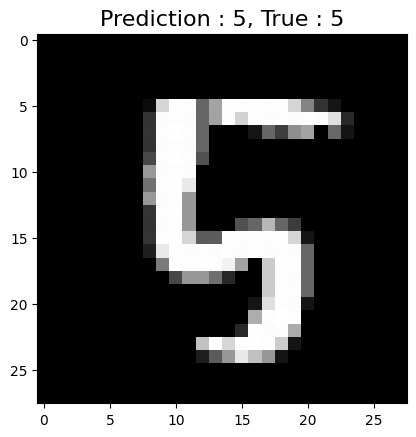

In [ ]:
# simple example
random_idx = np.random.choice(len(x_text))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Prediction : {}, True : {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28,28), cmap = "gray")

# Confusion matrix

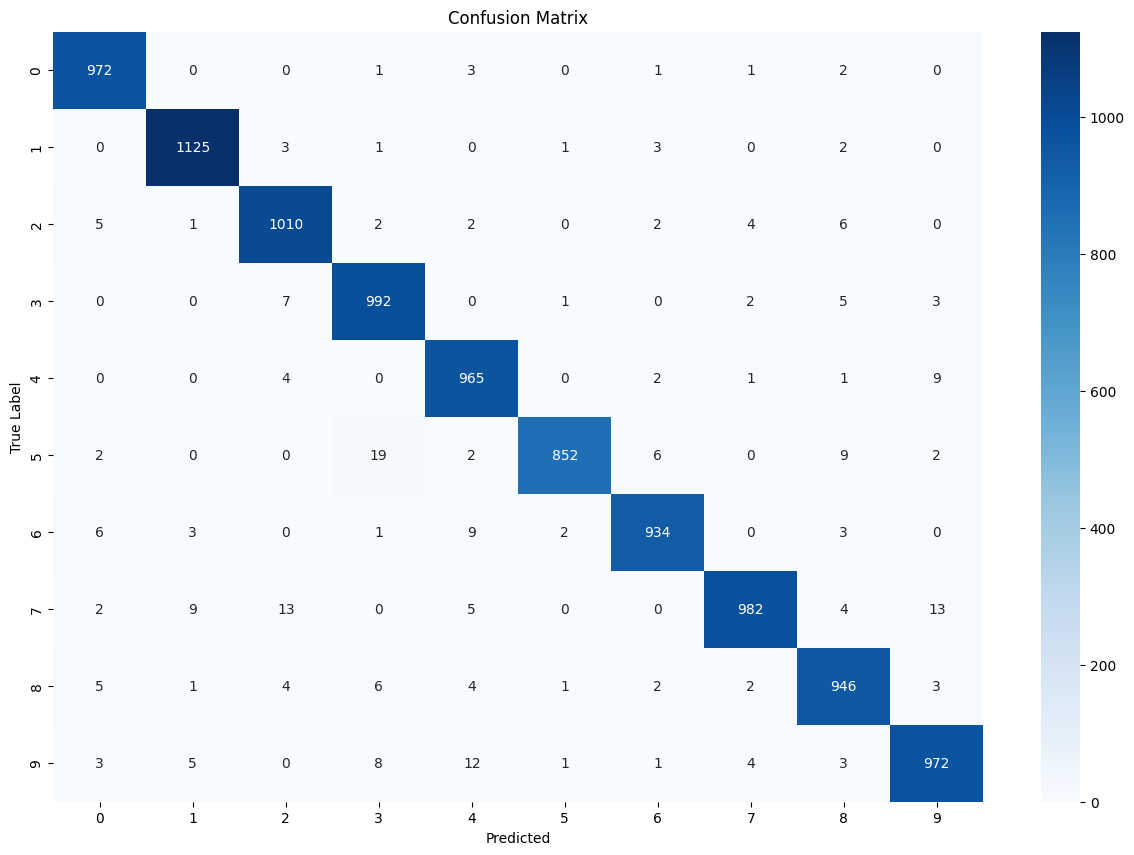

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#plot
f, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = "d", ax = ax, cmap = "Blues")
ax.set_xlabel("Predicted")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");

# Investgate Some Errors

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_probability_error = np.max(y_pred_errors, axis = 1)
true_probability_error = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
diff_error_pred_true = y_pred_probability_error - true_probability_error

#Get list of indices of sorted difference
sorted_idx_diff_error = np.argsort(diff_error_pred_true)
top_idx_diff_error = sorted_idx_diff_error[-5:] # 5 last ones

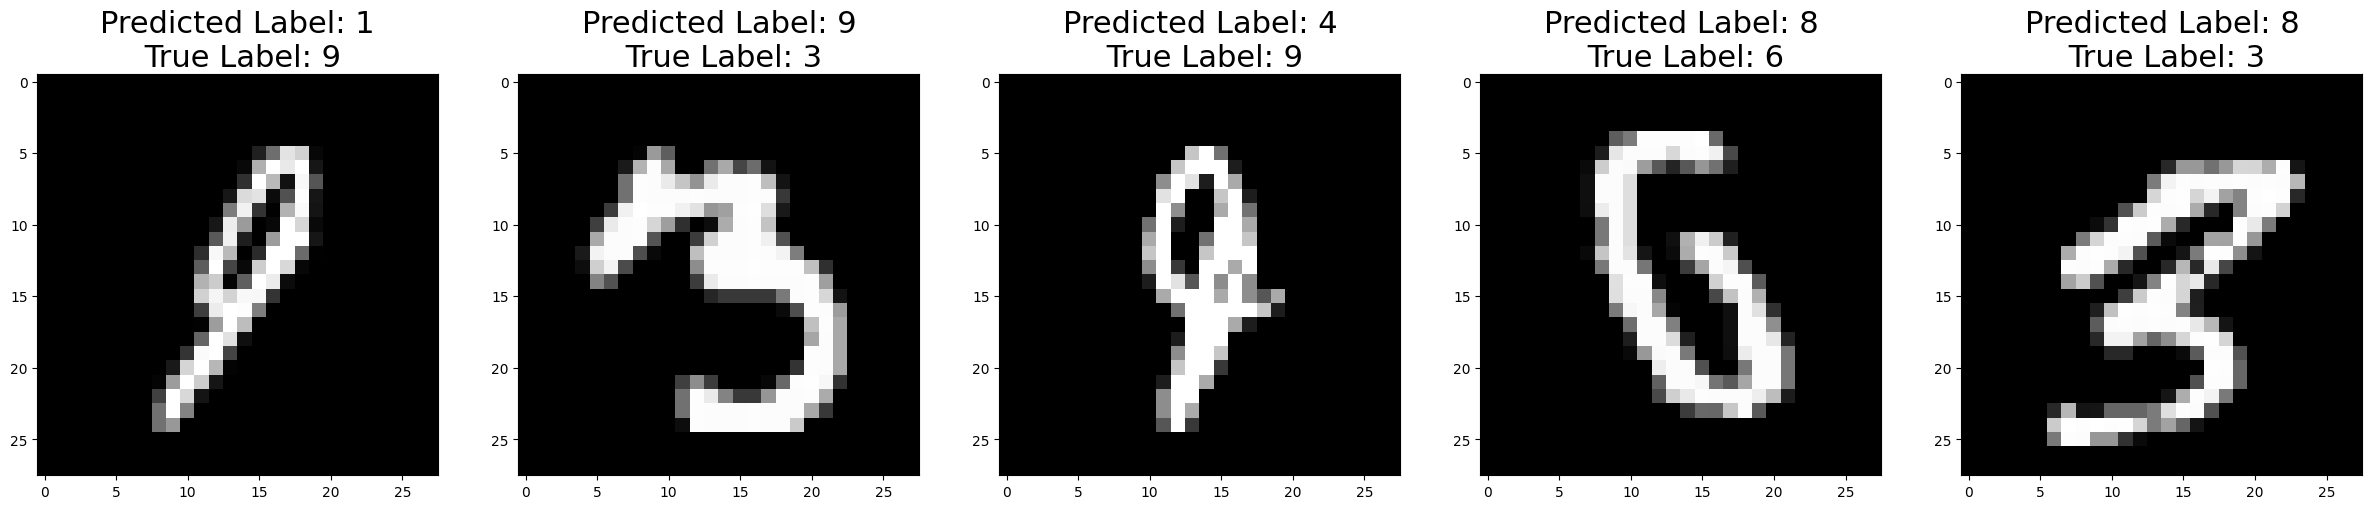

In [ ]:
# show top errors
num = len(top_idx_diff_error)
f, ax = plt.subplots(1, num, figsize = (30,30))

for i in range(0, num):
  idx = top_idx_diff_error[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap = "gray")
  ax[i].set_title("Predicted Label: {}\n True Label: {}".format(y_p, y_t), fontsize = 22)